In [22]:
import cfbd
import pandas as pd
import plotly

In [23]:
from plotly import graph_objects as go

In [49]:
configuration = cfbd.Configuration()
configuration.api_key['Authorization'] = 'JOo7NPQiRwoWx1kDmv1VDiujh+ra/nfYLRGy0TVt2KhLM+Yiu6BpXOC7W4YtjBdq'
configuration.api_key_prefix['Authorization'] = 'Bearer'

In [50]:
api_instance = cfbd.TeamsApi(cfbd.ApiClient(configuration))
teams = api_instance.get_fbs_teams(year=2022)

teams_df = pd.DataFrame.from_records([dict(team=t.school, color=t.color, alt_color=t.alt_color) for t in teams])
teams_df.head()

,team,color,alt_color
0,Air Force,#004a7b,#ffffff
1,Akron,#00285e,#84754e
2,Alabama,#690014,#f1f2f3
3,Appalachian State,#000000,#ffcd00
4,Arizona,#002449,#00205b


In [51]:
api_instance = cfbd.PlayersApi(cfbd.ApiClient(configuration))
production = api_instance.get_returning_production(year=2021)

production_df = pd.DataFrame.from_records([p.to_dict() for p in production])
production_df.head()

,season,team,conference,total_ppa,total_passing_ppa,total_receiving_ppa,total_rushing_ppa,percent_ppa,percent_passing_ppa,percent_receiving_ppa,percent_rushing_ppa,usage,passing_usage,receiving_usage,rushing_usage
0,2021,Air Force,Mountain West,126.8,35.0,20.8,71.0,0.742,1.000,0.540,0.724,0.724,1.000,0.745,0.662
1,2021,Akron,Mid-American,27.5,-19.8,23.1,24.2,0.611,0.756,0.545,0.826,0.805,0.902,0.694,0.788
2,2021,Alabama,SEC,148.6,16.7,90.1,41.7,0.198,0.058,0.268,0.336,0.260,0.072,0.349,0.368
3,2021,Appalachian State,Sun Belt,279.8,12.1,165.3,102.4,0.649,0.125,0.943,0.644,0.584,0.030,0.953,0.734
4,2021,Arizona,Pac-12,40.2,-15.2,41.4,14.0,0.442,-2.980,0.704,0.515,0.478,0.427,0.648,0.371


In [52]:
df = teams_df.merge(production_df, left_on=['team'], right_on=['team'], suffixes=['', '_'])
df.head()

,team,color,alt_color,season,conference,total_ppa,total_passing_ppa,total_receiving_ppa,total_rushing_ppa,percent_ppa,percent_passing_ppa,percent_receiving_ppa,percent_rushing_ppa,usage,passing_usage,receiving_usage,rushing_usage
0,Air Force,#004a7b,#ffffff,2021,Mountain West,126.8,35.0,20.8,71.0,0.742,1.000,0.540,0.724,0.724,1.000,0.745,0.662
1,Akron,#00285e,#84754e,2021,Mid-American,27.5,-19.8,23.1,24.2,0.611,0.756,0.545,0.826,0.805,0.902,0.694,0.788
2,Alabama,#690014,#f1f2f3,2021,SEC,148.6,16.7,90.1,41.7,0.198,0.058,0.268,0.336,0.260,0.072,0.349,0.368
3,Appalachian State,#000000,#ffcd00,2021,Sun Belt,279.8,12.1,165.3,102.4,0.649,0.125,0.943,0.644,0.584,0.030,0.953,0.734
4,Arizona,#002449,#00205b,2021,Pac-12,40.2,-15.2,41.4,14.0,0.442,-2.980,0.704,0.515,0.478,0.427,0.648,0.371


In [53]:
api_instance = cfbd.RatingsApi(cfbd.ApiClient(configuration))
ratings = api_instance.get_sp_ratings(year=2021)

ratings_df = pd.DataFrame.from_records([r.to_dict() for r in ratings])
ratings_df['offense_rating'] = ratings_df[['offense']].apply(lambda x: x.offense['rating'], axis=1)
ratings_df.head()

,year,team,conference,rating,ranking,second_order_wins,sos,offense,defense,special_teams,offense_rating
0,2021,Georgia,SEC,32.0,1.0,None,None,"{'ranking': 2.0, 'rating': 41.4, 'success': No...","{'ranking': 1.0, 'rating': 10.3, 'success': No...",{'rating': None},41.4
1,2021,Ohio State,Big Ten,29.3,2.0,None,None,"{'ranking': 1.0, 'rating': 47.2, 'success': No...","{'ranking': 20.0, 'rating': 20.6, 'success': N...",{'rating': None},47.2
2,2021,Alabama,SEC,26.0,3.0,None,None,"{'ranking': 4.0, 'rating': 40.9, 'success': No...","{'ranking': 9.0, 'rating': 15.6, 'success': No...",{'rating': None},40.9
3,2021,Michigan,Big Ten,23.4,4.0,None,None,"{'ranking': 19.0, 'rating': 36.5, 'success': N...","{'ranking': 10.0, 'rating': 15.8, 'success': N...",{'rating': None},36.5
4,2021,Cincinnati,American Athletic,21.2,5.0,None,None,"{'ranking': 13.0, 'rating': 37.5, 'success': N...","{'ranking': 11.0, 'rating': 15.9, 'success': N...",{'rating': None},37.5


In [54]:
df = df.merge(ratings_df[['team', 'rating', 'offense_rating']], left_on=['team'], right_on=['team'], suffixes=['', '_'])
df.head()

,team,color,alt_color,season,conference,total_ppa,total_passing_ppa,total_receiving_ppa,total_rushing_ppa,percent_ppa,percent_passing_ppa,percent_receiving_ppa,percent_rushing_ppa,usage,passing_usage,receiving_usage,rushing_usage,rating,offense_rating
0,Air Force,#004a7b,#ffffff,2021,Mountain West,126.8,35.0,20.8,71.0,0.742,1.000,0.540,0.724,0.724,1.000,0.745,0.662,7.4,30.0
1,Akron,#00285e,#84754e,2021,Mid-American,27.5,-19.8,23.1,24.2,0.611,0.756,0.545,0.826,0.805,0.902,0.694,0.788,-23.1,20.3
2,Alabama,#690014,#f1f2f3,2021,SEC,148.6,16.7,90.1,41.7,0.198,0.058,0.268,0.336,0.260,0.072,0.349,0.368,26.0,40.9
3,Appalachian State,#000000,#ffcd00,2021,Sun Belt,279.8,12.1,165.3,102.4,0.649,0.125,0.943,0.644,0.584,0.030,0.953,0.734,10.3,32.0
4,Arizona,#002449,#00205b,2021,Pac-12,40.2,-15.2,41.4,14.0,0.442,-2.980,0.704,0.515,0.478,0.427,0.648,0.371,-12.6,19.2


In [55]:
conf_filter = df['conference'].isin(['SEC', 'Big Ten', 'Big 12', 'Pac-12', 'ACC'])
filtered_df = df[conf_filter]
df = filtered_df

In [56]:
df['alt_color'].fillna('#ffffff', inplace=True)

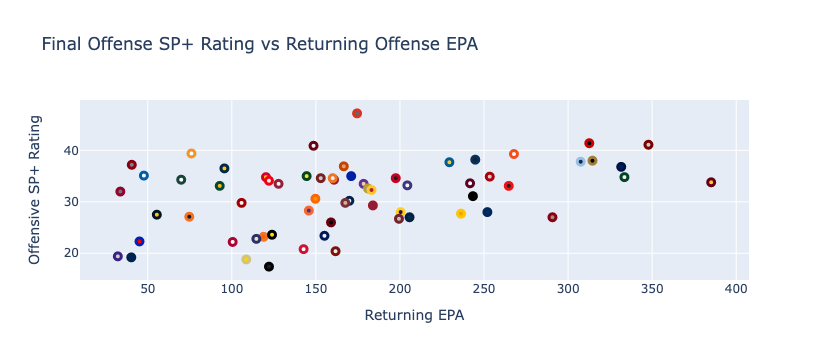

In [57]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['total_ppa'],
    y=df['offense_rating'],
    text=df['team'],
    mode='markers',
    marker=dict(size=7, color=df['alt_color'], line=dict(width=3, color=df['color']))
))

fig.update_layout(title='Final Offense SP+ Rating vs Returning Offense EPA',
                   xaxis_title='Returning EPA',
                   yaxis_title='Offensive SP+ Rating',)

# Show that chart!
fig.show()

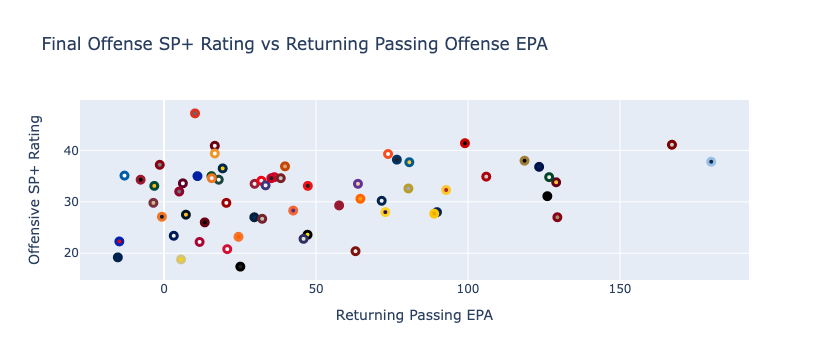

In [58]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['total_passing_ppa'],
    y=df['offense_rating'],
    text=df['team'],
    mode='markers',
    marker=dict(size=7, color=df['alt_color'], line=dict(width=3, color=df['color']))
))

fig.update_layout(title='Final Offense SP+ Rating vs Returning Passing Offense EPA',
                   xaxis_title='Returning Passing EPA',
                   yaxis_title='Offensive SP+ Rating',)

# Show that chart!
fig.show()